# <center> BBM409 : Introduction to Machine Learning Lab. </center>
## <center> Assignment 1 </center>

![alt_text](https://www.nokia.com/sites/default/files/styles/nokia_blog_page_image/public/blog/nokia-analytics-banner.jpg)


#### <center> Group 3 </center>
#### <center> *21626953 - İsmail Ateş  &  Mustafa Kollu - 21627485*</center>

**Abstract**

The purpose of this assignment is to help you understand and familiarize yourself with the K-Nearest Neighbor Algorithm. There are two parts to this task. The first part contains a KNN Classification and Weighted KNN Classification experiment and the second part includes a KNN Regression and Weighted KNN Regression experiment.

## Table of Content
[1. Functions](#functions) 

[2. Glass Material Classification](#glass1)   
    [* Glass Classification Dataset](#glass1.1)   
    [* Classification Performance Metric](#glass1.2)     
    [* Feature Normalization](#glass1.3)    
    [* Error Analysis for Classification](#glass1.4) 
    
[3. Concrete Material Strength Estimation from Data](#concrete1)  
    [* Concrete Compressive Strength Dataset](#concrete1.1)   
    [* Regression Performance Metric](#concrete1.2)     
    [* Feature Normalization](#concrete1.3)    
    [* Error Analysis for Regression](#concrete1.4)  
    
[4. References](#references)

## 1. Functions <a class="anchor" id="functions"></a>

Functions we use throughout the project

### _Import Library_

In [1]:
import random  #library used to pick a random number
import pandas as pd  #just uses for read csv
import numpy as np  #numpy library used throughout the whole project
from math import sqrt  #library for taking the square root of a number
from statistics import mode  #library used to get the mode of numbers
import datetime  #The library we use to calculate the time difference between algorithms

In [2]:
# this function drops an unnecessary feature
def dropFeatures(df, dropList): # df = dataframe , dropList = list of feature's indexes
    #creating a new numpy array with dataframe shape and an empty list to add necessary features
    new_df = np.zeros(shape=(df.shape[0], df.shape[1] - len(dropList))) 
    featureList = []
    #for i in  range dataframe columns count
    for i in range(0, df.shape[1]):
        #if feature is necessary 
        if i not in dropList:
            feature = []
            #add a feature in every sample to feature list
            for j in range(0, df.shape[0]):
                feature.append(df[j][i])
            #add feature list to featureList list
            featureList.append(feature)
    #featureList[0].size() = 214 and it's includes first feature values of every sample
    
    # for x in range necessary feature count
    for x in range(0, df.shape[1] - len(dropList)):
        #for y in range sample's count
        for y in range(0, df.shape[0]):
            new_df[y][x] = featureList[x][y]
    
    return new_df # new_df not includes non neccessary features

In [3]:
#In this function, we subtract the minimum value in our feature from our value and divide.
def normalizeFeature(val, min, max): 
    return (val - min) / (max - min)  # the new value by the difference between the maximum value and the minimum value.

In [4]:
#In this function, we apply the feature normalization to each value in the dataset.
def normalizeData(df): 
    normalizedDf = df
    #for i in range feature's count not includes target feature it's the last element of df
    for i in range(0, df.shape[1] - 1):
        feature = []
        #for j in range sample's count
        for j in range(0, df.shape[0]):
            feature.append(df[j][i])
        # feature[0].size() = 214 and it's includes first feature values of every sample
        
        #for sample's count it calls normalizeFeature func with calculated minimumum val of a 
        #feature and max val a feature
        for x in range(0, df.shape[0]):
            normalizedDf[x][i] = normalizeFeature(df[x][i], min(feature), max(feature))

    return normalizedDf

In [5]:
#This functios does 5foldcrossvalidation for knn and weighted classification. It takes dataFrame as a numpy array
#and takes K parameters as a list. It split the dataFrame to test Data(%20) and train Data(%20). This function splits
#the dataFrame in to 5 part and takes them respectively each part to test data and take rest of them to train data.
#It calculates the prediction and get accuracy for each part and k Params and and avarage accuracy for knn and weighted knn. 
#After each part calculations it prints the results. 

def kFoldCrossValidationClasification(df, kParams):  
    #splitNum = rounded result of to division of sample count to 5. It is  size of each 5 part
    splitNum = df.shape[0] // 5
    for k in kParams:  #for each K parameters 
        avgAccKnn = 0  #avarage result of knn classification
        avgAccWeightedKnn = 0  #avarage result of weighted knn classification
        avgCompileTimeKnn = 0  #avarage compile time for knn classification
        avgCompileTimeWeightedKnn = 0 #avarage compile time for weighted knn classification
        
        #for each splitted part of dataFrame
        for i in range(0, 5):  
            trainData = np.copy(df) #copy of DataFrame
            testData = np.zeros(shape=(splitNum, df.shape[1])) #creating test Data array
            #copying samples to test Data and add their indexes to indexList
            for y in range(splitNum * i, splitNum * (i + 1)):
                if i != 0:
                    testData[y - (splitNum * i)] = df[y]
                else:
                    testData[y] = df[y]
            #for  j in range to reversed for loop, delete samples in train Data which are added to test Data
            for j in range(splitNum - 1, -1, -1):  
                trainData = np.delete(trainData, (j + (splitNum * i)), 0)

            truePredictCount = 0
            print("-----------" + "Classification" + " k = " + str(k) + "-----------")
            print("***KNN***")
            start_time = datetime.datetime.now()
            
            #for each sample in test Data 
            for z in range(0, testData.shape[0]):
                element = knnClassification(trainData, testData[z], k)  # tahmin sonucu
                #if predicted feature's value is equals to test Data feature's value increase truePredictCount +1
                if element == testData[z][-1]:
                    truePredictCount += 1  
            
            end_time = datetime.datetime.now()
            avgCompileTimeKnn = avgCompileTimeKnn + ((end_time - start_time).total_seconds() * 1000)
            print("Set " + str(i) + " accurancy:" + str(
                (truePredictCount / testData.shape[0]) * 100)) 
            print((end_time - start_time).total_seconds() * 1000)
            #add accuracy to average accuracy
            avgAccKnn = avgAccKnn + ((truePredictCount / testData.shape[0]) * 100)

            print("***WEIGHTED KNN***")
            truePredictCount = 0
            start_time = datetime.datetime.now()
            #for each sample in test Data 
            for j in range(0, testData.shape[0]):
                element = weightedKnnClassification(trainData, testData[j], k)
                #if predicted feature's value is equals to test Data feature's value increase truePredictCount +1
                if element == testData[j][-1]:
                    truePredictCount += 1
            end_time = datetime.datetime.now()
            print("Set " + str(i) + " accurancy:" + str((truePredictCount / testData.shape[0]) * 100))
            print((end_time - start_time).total_seconds() * 1000)
            avgCompileTimeWeightedKnn = avgCompileTimeWeightedKnn + ((end_time - start_time).total_seconds() * 1000)
            avgAccWeightedKnn = avgAccWeightedKnn + ((truePredictCount / testData.shape[0]) * 100)
        print("")
        print("")
        print("////////////////////////")
        print("KNN = " + str(avgAccKnn / 5))
        print("Average Run Time = " + str(avgCompileTimeKnn / 5))
        print("Weighted KNN = " + str(avgAccWeightedKnn / 5))
        print("Average Run Time = " + str(avgCompileTimeWeightedKnn / 5))
        print("////////////////////////")
        print("")
        print("")

In [6]:
#This functios does 5foldcrossvalidation for knn and weighted regression. It takes dataFrame as a numpy array
#and takes K parameters as a list. It split the dataFrame to test Data(%20) and train Data(%20). This function splits
#the dataFrame in to 5 part and takes them respectively each part to test data and take rest of them to train data.
#It calculates the prediction and get mean absolute error for each part and k Params and and avarage mean absolute error
#for knn and weighted knn. After each part calculations it prints the results. 
def kFoldCrossValidationRegression(df, kParams):
    #splitNum = rounded result of to division of sample count to 5. It is  size of each 5 part
    splitNum = df.shape[0] // 5
    for k in kParams:  #for each K parameters 
        avgMaeKnn = 0  #avarage mae of knn regression
        avgMaeWeightedKnn = 0  #avarage mae of weighted knn regression
        avgCompileTimeKnn = 0  #avarage compile time for knn regression
        avgCompileTimeWeightedKnn = 0 #avarage compile time for weighted knn regression
        
        #for each splitted part of dataFrame
        for i in range(0, 5):
            dummyDf = np.copy(df)  #copy of DataFrame
            indexList = []         #creating test Data array
            testData = np.zeros(shape=(splitNum, df.shape[1]))
            trainData = np.zeros(shape=(df.shape[0] - splitNum, df.shape[1]))
            #copying samples to test Data and add their indexes to indexList
            for y in range(splitNum * i, splitNum * (i + 1)):
                if i != 0:
                    testData[y - (splitNum * i)] = df[y]
                else:
                    testData[y] = df[y]
                indexList.append(y)
            #for  j in range to reversed for loop, delete samples in train Data which are added to test Data
            for j in range(len(indexList) - 1, -1, -1):
                dummyDf = np.delete(dummyDf, (j + (splitNum * i)), 0)

            for j in range(0, dummyDf.shape[0]):
                trainData[j] = dummyDf[j]

            absoluteError = 0
            print("-----------" + "Regression" + " k = " + str(k) + "-----------")
            print("***KNN***")
            start_time = datetime.datetime.now()
            
            #for each sample in test Data 
            for z in range(0, testData.shape[0]):
                element = knnRegression(trainData, testData[z], k)
                absoluteError = absoluteError + abs(element - testData[z][-1])

            end_time = datetime.datetime.now()
            print("Set " + str(i) + " MAE " + str(absoluteError / testData.shape[0]))
            avgCompileTimeKnn = avgCompileTimeKnn + ((end_time - start_time).total_seconds() * 1000)
            print((end_time - start_time).total_seconds() * 1000)
            #add mae to averageMae
            avgMaeKnn = avgMaeKnn + (absoluteError / testData.shape[0])

            print("***WEIGHTED KNN***")
            absoluteError = 0
            start_time = datetime.datetime.now()
            #for each sample in test Data 
            for j in range(0, testData.shape[0]):
                element = weightedKnnRegression(trainData, testData[j], k)
                absoluteError = absoluteError + abs(element - testData[z][-1])

            end_time = datetime.datetime.now()
            print((end_time - start_time).total_seconds() * 1000)
            avgCompileTimeWeightedKnn = avgCompileTimeWeightedKnn + ((end_time - start_time).total_seconds() * 1000)
            print("Set " + str(i) + " MAE " + str(absoluteError / testData.shape[0]))
            #add mae to averageMae
            avgMaeWeightedKnn = avgMaeWeightedKnn + (absoluteError / testData.shape[0])
        print("")
        print("")
        print("////////////////////////")
        print("KNN = " + str(avgMaeKnn / 5))
        print("Run Time = " + str(avgCompileTimeKnn/5))
        print("Weighted KNN = " + str(avgMaeWeightedKnn / 5))
        print("Run Time = " + str(avgCompileTimeWeightedKnn/5))
        print("////////////////////////")
        print("")
        print("")

In [7]:
#this function calculates the euclide distance between target sample and other row in train set
def euclideDistance(targetRow, otherRow):
    distance = 0

    for i in range(len(targetRow) - 1):
        distance = distance + ((targetRow[i] - otherRow[i]) ** 2))

    return sqrt(distance)

In [8]:
#this function returns the nearest k neighbours to target sample
def getNeighboursKNN(trainData, targetRow, k):
    distanceList = []
    dataList = []
    
    #for each element in trainData
    for i in trainData:
        distance = euclideDistance(targetRow, i) #distance between target sample and the sample in the trainData
        distanceList.append(distance)
        dataList.append(i)
    distanceList = np.array(distanceList)
    dataList = np.array(dataList)

    index_distance = np.argsort(distanceList) #sort the distanceList and add the sorted elements indexes to index_distance
    dataList = dataList[index_distance] #sort the dataList according to elements in the index_distance
    neighbours = dataList[:k] #take the nearest k sample to target sample in to neighbours array

    return neighbours


In [9]:
def getNeighboursWeightedKNN(trainData, targetRow, k):
    distanceList = []
    dataList = []
    
    #for each element in trainData
    for i in trainData:
        distance = euclideDistance(targetRow, i) #distance between target sample and the sample in the trainData
        distanceList.append(distance)
        dataList.append(i)
    distanceList = np.array(distanceList)
    dataList = np.array(dataList)

    index_distance = np.argsort(distanceList) #sort the distanceList and add the sorted elements indexes to index_distance
    dataList = dataList[index_distance] #sort the dataList according to elements in the index_distance
    neighbours = dataList[:k] #take the nearest k sample to target sample in to neighbours array
    
    distancesForNeighbours = [] #distances of the neighbours
    for i in range(k):
        element = distanceList[index_distance[i]]
        distancesForNeighbours.append(element)

    return [neighbours, distancesForNeighbours]

In [10]:
#this function takes the nearest neighbours to the target sample and return the most repeated class value.
def knnClassification(trainData, targetRow, k):
    neighours = getNeighboursKNN(trainData, targetRow, k)
    classes = []
    for i in neighours:
        classes.append(i[-1])
    prediction = mode(classes)

    return prediction

In [11]:
#this function takes the nearest neighbours to target sample and calculates the weights of this samples then
#group them by the their class value then sum their weights and choose the class group which haves the max weight
#then returns the class value.
def weightedKnnClassification(trainData, targetRow, k):
    neighours = getNeighboursWeightedKNN(trainData, targetRow, k)
    weights = {}
    
    for i in range(k):
        if neighours[0][i][-1] not in weights.keys():
            weights[neighours[0][i][-1]] = 1 / neighours[1][i]
        else:
            weight = weights[neighours[0][i][-1]]
            weight = weight + 1 / neighours[1][i]
            weights[neighours[0][i][-1]] = weight
            
    max = 0
    for i in range(k):
        if weights[neighours[0][i][-1]] > max:
            max = weights[neighours[0][i][-1]]

    for i in range(k):
        if weights[neighours[0][i][-1]] == max:
            prediction = neighours[0][i][-1]
    return prediction

In [12]:
#this function takes the nearest neighbours to the target sample and sum their target feature's values and divide
#this value to k value.
def knnRegression(trainData, targetRow, k):
    neighours = getNeighboursKNN(trainData, targetRow, k)

    prediction = 0
    for i in range(k):
        prediction = prediction + neighours[i][-1]

    return prediction / k

In [13]:
#this function takes the nearest neighbours to the target sample and for each sample: it's multiply their weight and
#target feature value and sum this values. Then divide this value to the sum of these sample's weights. Then return this.
def weightedKnnRegression(trainData, targetRow, k):
    neighours = getNeighboursWeightedKNN(trainData, targetRow, k)

    prediction = 0
    totalWeight = 0

    for i in range(k):
        prediction = prediction + (neighours[0][i][-1] * (1 / neighours[1][i]))
        totalWeight = totalWeight + (1 / neighours[1][i])

    return prediction / totalWeight

## 2. Glass Material Classification <a class="anchor" id="glass1"></a>

In this part of the assignment, we apply the nearest neighbor algorithm and the weighted KNN algorithm to classify different glass types. We divided our dataset into two sets; the training set that will be used to learn the model and the validation set that will be used to measure the success of your model. We use 5-fold cross-validation, a model validation technique that tests the results of a statistical analysis on an independent data set. Its main use is to predict with what accuracy a forecasting system will work in practice. In addition, we take the neighborhood value (k value) for our KNN algorithm as 1,3,5,7,9, respectively. We also test our estimates with both min-max normalization and normal values.

#### Glass Classification Dataset <a class="anchor" id="glass1.1"></a>
Dataset consists of 214 samples with discrete 6 class types. Type 4 class have no samples in the dataset, thus the dataset includes 6 different class types{”1”, ”2”, ”3”, ”5”, ”6”, ”7”}.

__Attribute Information:__
1. RI: refractive index
2. Na: Sodium
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type: Type of glass: (class attribute)

#### Classification Performance Metric <a class="anchor" id="glass1.2"></a>

We calculate the accuracy of our model to measure the success of the classification method. For this method we will use the following metric:

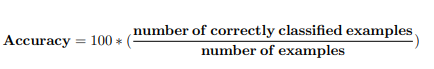

We perform this process in the method named kFoldCrossValidationClassification.

#### Feature Normalization <a class="anchor" id="glass1.3"></a>

We use min-max normalization on the features of your samples to re-scale each feature between (0-1) range. Because normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly. For this method we will use the following metric:

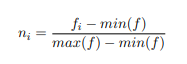

We perform this method in a method called Normalized Data.

#### Error Analysis for Classification <a class="anchor" id="glass1.4"></a>

In [14]:
dfGlass = pd.read_csv("glass.csv")

dfGlass = dfGlass.to_numpy()
dfGlass = dropFeatures(dfGlass, [4])
np.random.shuffle(dfGlass)
print("****** Unnormalized data *****")
dfGlass = np.unique(dfGlass, axis=0)

kFoldCrossValidationClasification(dfGlass, [1, 3, 5, 7, 9])

dfGlass = normalizeData(dfGlass)
dfGlass = np.unique(dfGlass, axis=0)
print("**************** Normalized Data ************")
kFoldCrossValidationClasification(dfGlass, [1, 3, 5, 7, 9])

****** Unnormalized data *****
-----------Classification k = 1-----------
***KNN***
Set 0 accurancy:64.28571428571429
61.86
***WEIGHTED KNN***
Set 0 accurancy:64.28571428571429
51.867000000000004
-----------Classification k = 1-----------
***KNN***
Set 1 accurancy:57.14285714285714
53.858000000000004
***WEIGHTED KNN***
Set 1 accurancy:57.14285714285714
75.788
-----------Classification k = 1-----------
***KNN***
Set 2 accurancy:35.714285714285715
66.33
***WEIGHTED KNN***
Set 2 accurancy:35.714285714285715
61.994
-----------Classification k = 1-----------
***KNN***
Set 3 accurancy:38.095238095238095
49.867000000000004
***WEIGHTED KNN***
Set 3 accurancy:38.095238095238095
56.357
-----------Classification k = 1-----------
***KNN***
Set 4 accurancy:50.0
48.844
***WEIGHTED KNN***
Set 4 accurancy:50.0
53.094


////////////////////////
KNN = 49.04761904761905
Average Run Time = 56.1518
Weighted KNN = 49.04761904761905
Average Run Time = 59.82000000000001
////////////////////////


-----------C

-----------Classification k = 7-----------
***KNN***
Set 4 accurancy:35.714285714285715
50.893
***WEIGHTED KNN***
Set 4 accurancy:38.095238095238095
52.829


////////////////////////
KNN = 45.71428571428572
Average Run Time = 51.26379999999999
Weighted KNN = 46.66666666666667
Average Run Time = 52.044999999999995
////////////////////////


-----------Classification k = 9-----------
***KNN***
Set 0 accurancy:71.42857142857143
49.876999999999995
***WEIGHTED KNN***
Set 0 accurancy:69.04761904761905
50.886
-----------Classification k = 9-----------
***KNN***
Set 1 accurancy:64.28571428571429
51.859
***WEIGHTED KNN***
Set 1 accurancy:64.28571428571429
51.833
-----------Classification k = 9-----------
***KNN***
Set 2 accurancy:28.57142857142857
52.857
***WEIGHTED KNN***
Set 2 accurancy:33.33333333333333
51.547999999999995
-----------Classification k = 9-----------
***KNN***
Set 3 accurancy:40.476190476190474
50.835
***WEIGHTED KNN***
Set 3 accurancy:38.095238095238095
55.853
-----------Class

### Accuracy Comparison

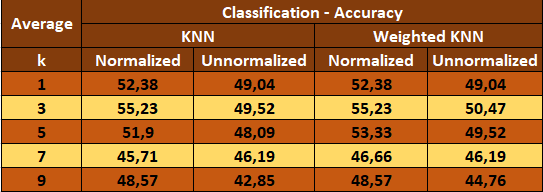 
#### <center> *Table 1* </center>

The results in Table 1 were obtained by taking the average of 5 different results obtained from the 5-fold cross-validation method.

#### Accuracy Comparison by K-Values

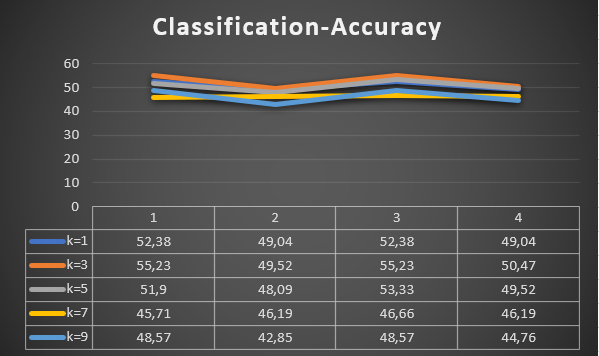
#### <center> *Graphic 1* </center>

When we look at Table 1 and Graphic 1, we got the best result for the k value at the value where k is 3.
When we look at Table 1 and Graphic 1, we got the worst result for the k value at the value where k is 7.
Based on these data, we see that our accuracy rate decreases as the k value increases.

#### Accuracy Comparison by Normalized

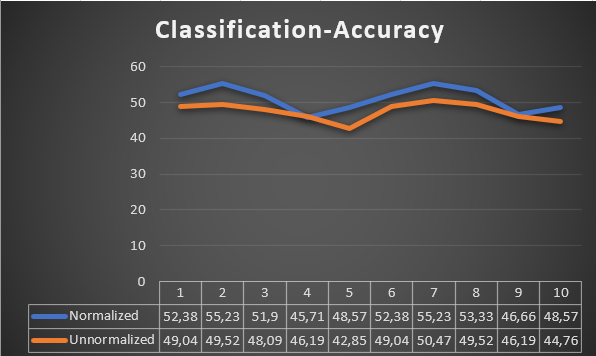
#### <center> *Graphic 2* </center>

When we look at Table 1 and Graphic 2, we see that we get more accurate results from the data sets that are normalized than the datasets that are non-normalized.
Based on these data, we notice that our accuracy rate increases when we normalize our data sets in classification.

#### Accuracy Comparison by Algorithm

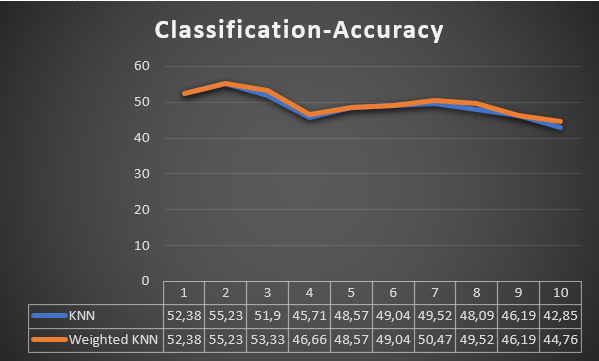
#### <center> *Graphic 3* </center>

When we look at Table 1 and Graphic 3, we see that we generally get worse results than the KNN algorithm Weighted KNN algorithm.
Based on these data, we see that the algorithms we use in classification affect our accuracy rate.

### Run Time Comparison

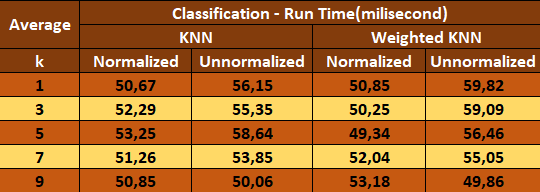
#### <center> *Table 2* </center>

The results in Table 2 were obtained by taking the average of 5 different results obtained from the 5-fold cross-validation method.

#### Run Time Comparison by K Values

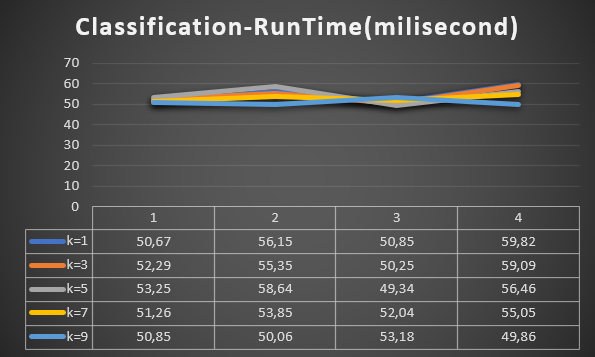
#### <center> *Graphic 4* </center>

When we look at Table 2 and Graphic 4, we obtained the best result among the Run Time values at the value where k is 9.
When we look at Table 2 and Graphic 4, we got the worst result among the Run Time values at the value where k is 5.
From this point of view, we could not see that the increase or decrease of the k value has a noticeable effect on the Run Time.

#### Run Time Comparison by Normalized

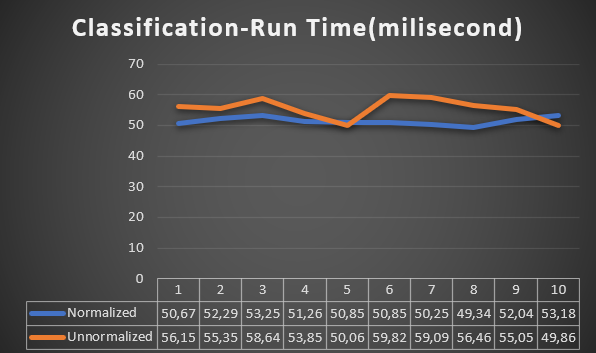
#### <center> *Graphic 5* </center>

When we look at Table 2 and Graphic 5, we see that normalized data sets give faster results than non-normalized data sets.
Based on these data, when we normalize our data sets in classification, we see that the run time decreases.

#### Run Time Comparison by Algorithm

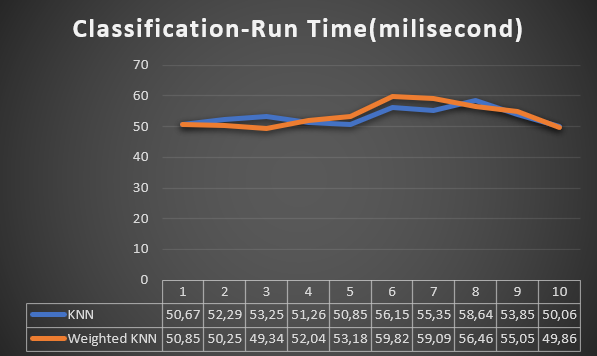
#### <center> *Graphic 6* </center>

When we look at Table 2 and Graphic 6, we see that the Weighted KNN algorithm generally produces faster results than the KNN algorithm.
Based on these data, we see that the algorithms we use in classification affect Run Time.

### Conclusion

When we look at it in general, the results we get are close to each other due to the small amount of data used. When we look at Accuracy, we see that the highest value is 55.23 and the lowest value is 42.85. Based on this, when the k value is 3 in classification, we get the best result when normalized data is used. We get the worst result when we use unnormalized data, take the value of k as 9 and use the KNN algorithm. Based on these data, we can notice that the KNN algorithm produces more unstable results than the Weighted KNN algorithm. When we look at Table 1 and Table 2, we see that we get both more accurate and faster results with normalized data. Based on this, scaling the data between 1-0 values ​​with min max normalization allows us to obtain more accurate results. We also see that the Weighted KNN algorithm works more successfully in different situations.

## 3. Concrete Material Strength Estimation from Data <a class="anchor" id="concrete1"></a>

In this part of the assignment, we implement a nearest neighbor algorithm and weighted KNN algorithm to estimate strength rate values of different concrete materials. We divided our training dataset into two sets; the training set that will be used to learn the model and the validation set that will be used to measure the success of your model. We use 5-fold cross-validation, a model validation technique that tests the results of a statistical analysis on an independent data set. Its main use is to predict with what accuracy a forecasting system will work in practice. In addition, we take the neighborhood value (k value) for our KNN algorithm as 1,3,5,7,9, respectively.

#### Concrete Compressive Strength Dataset <a class="anchor" id="concrete1.1"></a>

Dataset consists of 1030 samples with continuous concrete strength rate values.

Attribute information for each sample in dataset:
1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate
8. Age
9. Concrete compressive strength (”csMPa”, ground-truth strength value of cement material)

#### Regression Performance Metric <a class="anchor" id="concrete1.2"></a>

We compute Mean Absolute Error of your model to measure the success of your regression method. For this method we will use the following metric:

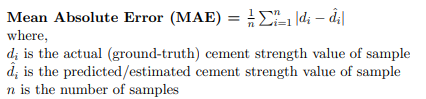

We perform this process in the method named kFoldCrossValidationRegression.

#### Feature Normalization <a class="anchor" id="concrete1.3"></a>

We use min-max normalization on the features of your samples to re-scale each feature between (0-1) range. Because normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly. For this method we will use the following metric:

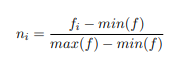

We perform this method in a method called Normalized Data.

#### Error Analysis for Regression <a class="anchor" id="concrete1.4"></a>

In [15]:
dfConcrete = pd.read_csv("Concrete_Data_Yeh.csv")

dfConcrete = dfConcrete.to_numpy()
np.random.shuffle(dfConcrete)
print("******* Unnormalized Data **********")
dfConcrete = np.unique(dfConcrete, axis=0)

kFoldCrossValidationRegression(dfConcrete, [1, 3, 5, 7, 9])

dfConcrete = normalizeData(dfConcrete)
dfConcrete = np.unique(dfConcrete, axis=0)
print("*********** Normalized Data ***********")

kFoldCrossValidationRegression(dfConcrete, [1, 3, 5, 7, 9])

******* Unnormalized Data **********
-----------Regression k = 1-----------
***KNN***
Set 0 MAE 9.558009950248756
1207.307
***WEIGHTED KNN***
1146.449
Set 0 MAE 13.012039800995023
-----------Regression k = 1-----------
***KNN***
Set 1 MAE 7.3412437810945255
1231.294
***WEIGHTED KNN***
1195.804
Set 1 MAE 19.051243781094527
-----------Regression k = 1-----------
***KNN***
Set 2 MAE 8.526218905472637
1202.231
***WEIGHTED KNN***
1213.0430000000001
Set 2 MAE 21.257064676616924
-----------Regression k = 1-----------
***KNN***
Set 3 MAE 7.726567164179108
1238.964
***WEIGHTED KNN***
1133.515
Set 3 MAE 13.993283582089559
-----------Regression k = 1-----------
***KNN***
Set 4 MAE 12.724179104477615
1128.088
***WEIGHTED KNN***
1098.299
Set 4 MAE 33.387661691542256


////////////////////////
KNN = 9.175243781094528
Run Time = 1201.5768
Weighted KNN = 20.14025870646766
Run Time = 1157.422
////////////////////////


-----------Regression k = 3-----------
***KNN***
Set 0 MAE 8.734129353233836
1082.15

Set 0 MAE 10.198794914317306
1121.289
***WEIGHTED KNN***
1166.948
Set 0 MAE 11.649551839973023
-----------Regression k = 9-----------
***KNN***
Set 1 MAE 7.739093421779989
1140.769
***WEIGHTED KNN***
1060.274
Set 1 MAE 17.169140557415872
-----------Regression k = 9-----------
***KNN***
Set 2 MAE 7.790022111663906
1049.828
***WEIGHTED KNN***
1065.895
Set 2 MAE 21.08718709691439
-----------Regression k = 9-----------
***KNN***
Set 3 MAE 8.144079601990057
1105.244
***WEIGHTED KNN***
1048.811
Set 3 MAE 10.704303643962653
-----------Regression k = 9-----------
***KNN***
Set 4 MAE 12.395771144278608
1052.1529999999998
***WEIGHTED KNN***
1060.74
Set 4 MAE 35.07273422745644


////////////////////////
KNN = 9.253552238805975
Run Time = 1093.8565999999998
Weighted KNN = 19.136583473144476
Run Time = 1080.5336
////////////////////////




### MAE Comparison

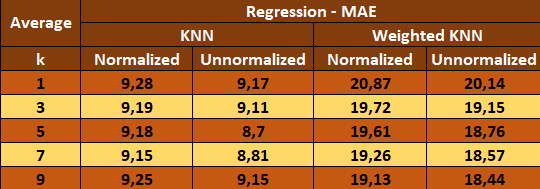
#### <center> *Table 3* </center>

The results in Table 3 were obtained by taking the average of 5 different results obtained from the 5-fold cross-validation method.

#### Comparison by K Values

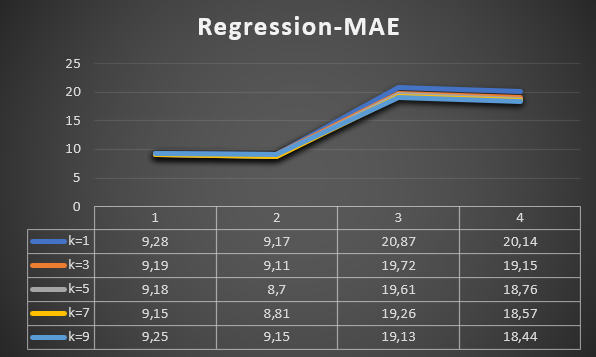
#### <center> *Graphic 7* </center>

When we look at Table 3 and Graphic 7, we obtained the best result for the k value at the value where k is 7.
When we look at Table 3 and Graphic 7, we got the worst result for the k value at the value where k is 1.
Based on these data, we see that the MAE generally decreases as the k value increases.

#### Comparison by Normalized

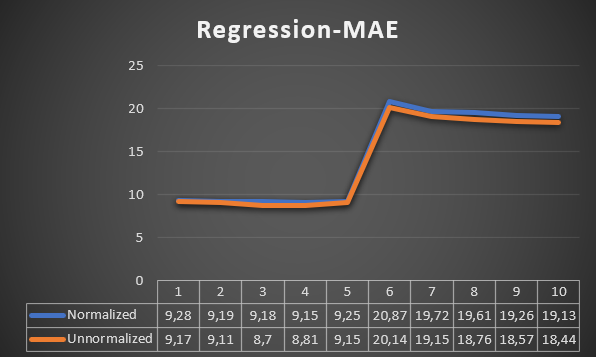
#### <center> *Graphic 8* </center>

When we look at Table 3 and Graphic 8, we see that the data sets that are not normalized are more accurate than the datasets that are applied normalized.
Based on these data, we notice that MAE decreases when we do not normalize our data sets in classification.

#### Comparison by Algorithm

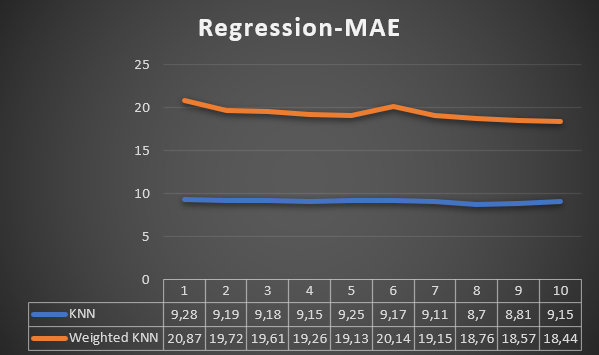
#### <center> *Graphic 9* </center>

When we look at Table 3 and Graphic 9, we see that the KNN algorithm achieves much better results than the Weighted KNN algorithm.
Based on these data, we see that the algorithms we use in classification affect our accuracy rate.

### Run Time Comparison

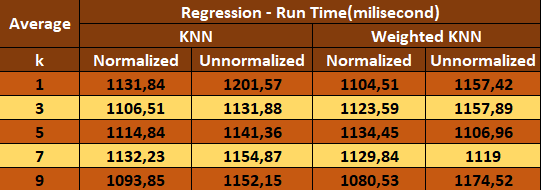
#### <center> *Table 4* </center>

The results in Table 4 were obtained by taking the average of 5 different results obtained from the 5-fold cross-validation method.

#### Comparison by K Values

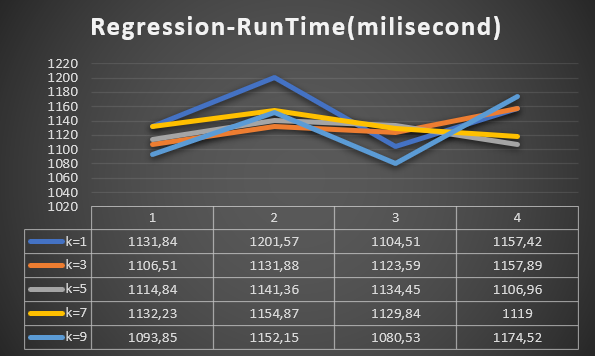
#### <center> *Graphic 10* </center>

When we look at Table 4 and Graphic 10, we obtained the best result among the Run Time values at the value where k is 9.
When we look at Table 4 and Graphic 10, we got the worst result among the Run Time values at the value where k is 1.
Since the results are very close, we could not see that the increase or decrease of the k value has a noticeable effect on the Run Time.

#### Comparison by Normalized

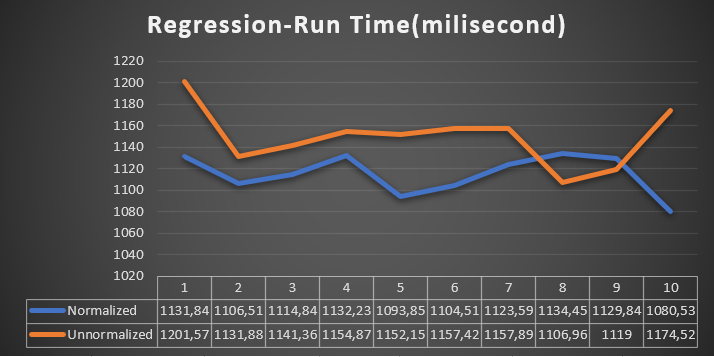
#### <center> *Graphic 11* </center>

When we look at Table 4 and Graphic 11, we see that normalized data sets give faster results than non-normalized data sets.
Based on these data, when we normalize our data sets in classification, we see that the run time decreases.

#### Comparison by Algorithm

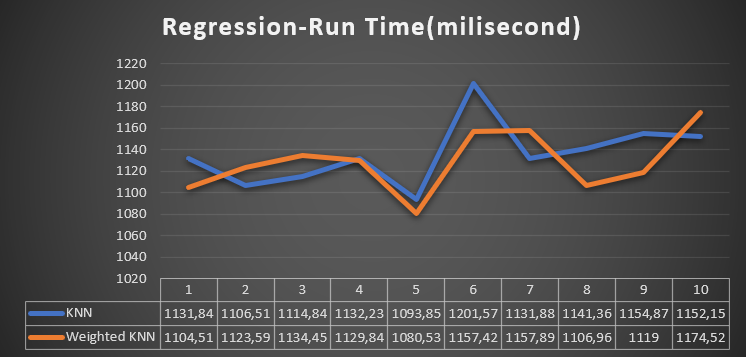
#### <center> *Graphic 12* </center>

When we look at Table 4 and Graphic 12, we cannot say exactly because the statistics are variable.
Based on these data, we see that the algorithms we use in classification affect Run Time differently in different situations.

### Conclusion

When we look at it in general, the results we get are close to each other due to the small amount of data used. When we look at MAE, we see that the highest value is 20.87 and the lowest value is 8.7. Based on this, we get the best result when the k value is taken as 5 in the regression, normalized data is used and the KNN algorithm is used. We get the worst result when we use unnormalized data, take the value of k as 1 and use the Weighted KNN algorithm. Based on these data, we can notice that the KNN algorithm produces much better results than the Weighted KNN algorithm. When we look at Table 3 and Table 4, we see that we obtain both more accurate and faster results with non-normalized data. We also see that the KNN algorithm works more successfully in different situations. Generally, we can say that we get better results as the k value increases.

## 4. References <a class="anchor" id="references"></a>

1. Lecture Notes: https://web.cs.hacettepe.edu.tr/~abc/teaching/bbm406/index.php

2. Scikit Learn Official Website: https://scikit-learn.org/stable/

3. StatQuest with Josh Starmer Youtube Page: https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

4. Medium Page: https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

**Disclaimer!** <font color='grey'>This notebook was prepared by İsmail Ateş & Mustafa Kollu as a assignment for the *BBM409 : Introduction to Machine Learning Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.
